In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
ec=pd.read_csv("/content/economic_index.csv")
ec.head(10)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [ ]:
## drop Unnecessary cols:
ec.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [ ]:
ec.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
ec.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
## Check null values:
ec.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


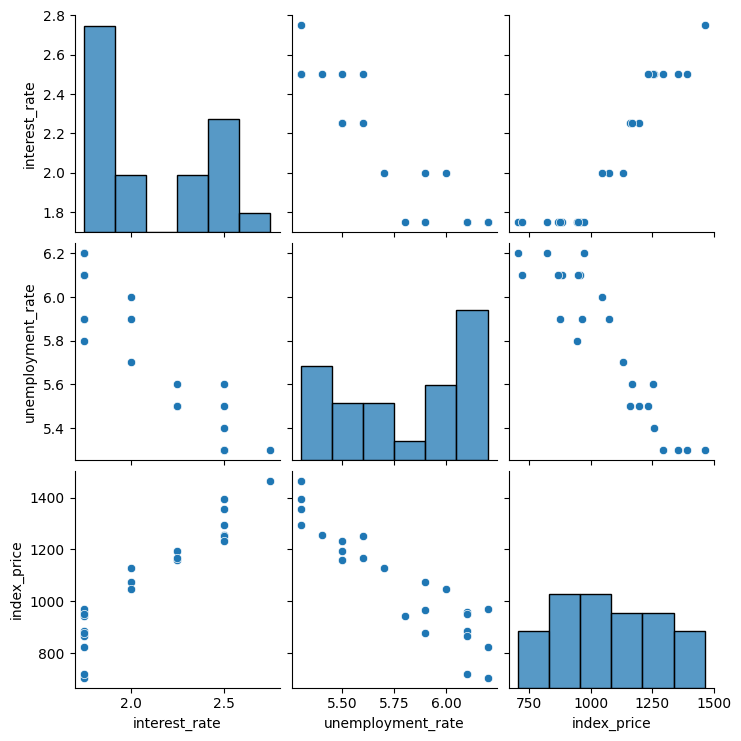

In [ ]:
## Visualization:
sns.pairplot(ec)

In [ ]:
ec.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

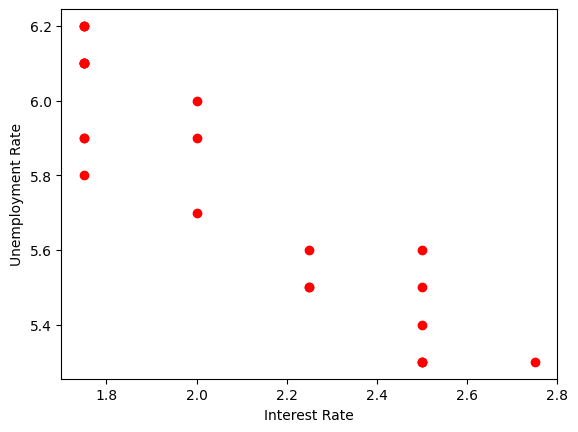

In [ ]:
## Visualize the datapoints more closely
plt.scatter(ec['interest_rate'],ec['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [ ]:
## Indepenedent and Dependent features:
X=ec.iloc[:,:-1]
y=ec.iloc[:,-1]

In [ ]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [ ]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

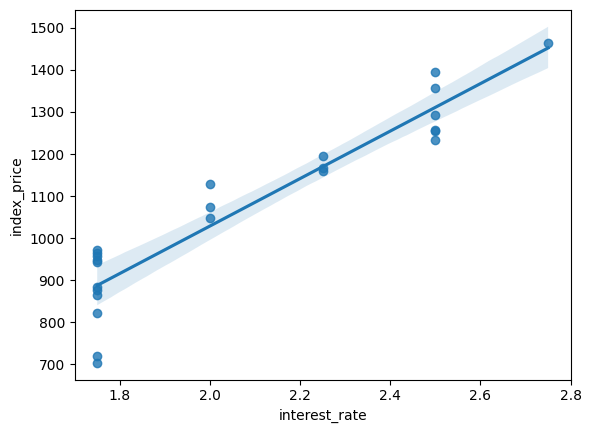

In [ ]:
sns.regplot(x=ec['interest_rate'],y=ec['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

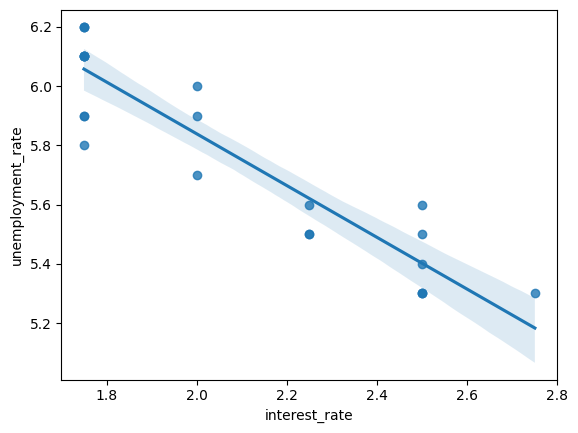

In [ ]:
sns.regplot(x=ec['interest_rate'],y=ec['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

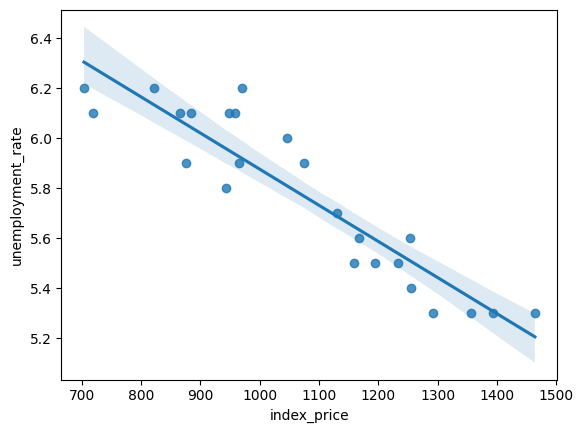

In [ ]:
sns.regplot(x=ec['index_price'],y=ec['unemployment_rate'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                   cv=3)

In [ ]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [ ]:
## prediction
y_pred=regression.predict(X_test)

In [ ]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [ ]:
## Performance Metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

## Display adjusted R - Squared
print(1- (1-score)*(len(y_test)-1 / len(y_test)- X_test.shape[1]-1))

0.8278978091457145
0.5123771259128579


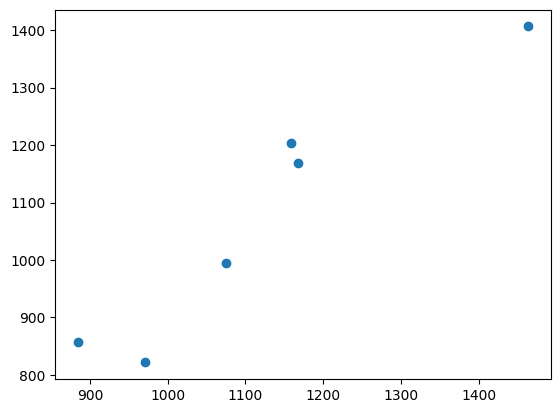

In [ ]:
## Assumptions:
plt.scatter(y_test,y_pred)

In [ ]:
residuals = y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


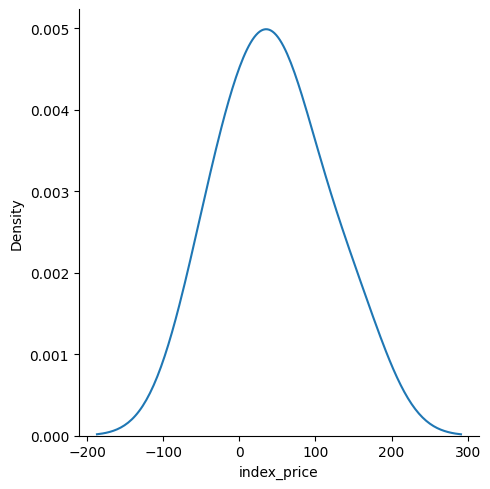

In [ ]:
## Plot this residuals
sns.displot(residuals,kind='kde')

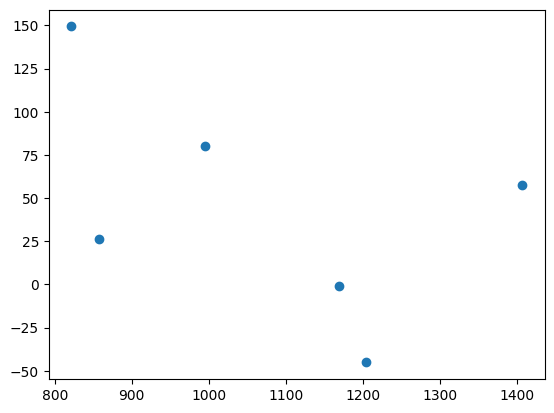

In [ ]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [113]:
## Using The OLS Now:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [114]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 28 Sep 2025   Prob (F-statistic):                       0.754
Time:                        14:37:32   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
print(regression.coef_)

[  88.27275507 -116.25716066]
